In [1]:
import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import string # this is used for string manipulations
from nltk.corpus import inaugural
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS

In [2]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

inaug=inaugural.raw('1941-Roosevelt.txt')+inaugural.raw('1961-Kennedy.txt')+inaugural.raw('1973-Nixon.txt')
inaug

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Vikas\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

#### 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [3]:
# Stotring the speeches
textR=inaugural.raw('1941-Roosevelt.txt')
textK=inaugural.raw('1961-Kennedy.txt')
textN=inaugural.raw('1973-Nixon.txt')

###### Finding the Number of Words in each speech and combined speech

In [4]:
# Checking the  characters in all speeches
print('Total number of characters in speech of Roosevelt are:',len(inaugural.raw('1941-Roosevelt.txt')))
print('Total number ofcharacters in speech of Kennedy are:',len(inaugural.raw('1961-Kennedy.txt')))
print('Total number of characters in speech of Nixon are:',len(inaugural.raw('1973-Nixon.txt')))
print('Grand Total number of characters in all speeches are:',len(textR+textK+textN))

Total number of characters in speech of Roosevelt are: 7571
Total number ofcharacters in speech of Kennedy are: 7618
Total number of characters in speech of Nixon are: 9991
Grand Total number of characters in all speeches are: 25180


######  Finding the Number of Words in each speech and combined speech

In [5]:
wordsR=inaugural.words('1941-Roosevelt.txt')
wordsK=inaugural.words('1961-Kennedy.txt')
wordsN=inaugural.words('1973-Nixon.txt')

In [6]:
# Checking the words in all speeches
print('Total number of words in speech of Roosevelt are:',len(inaugural.words('1941-Roosevelt.txt')))
print('Total number of words in speech of Kennedy are:',len(inaugural.words('1961-Kennedy.txt')))
print('Total number of words in speech of Nixon are:',len(inaugural.words('1973-Nixon.txt')))
print('Grand Total number of words in all speeches are:',len((wordsR+wordsK+wordsN)))

Total number of words in speech of Roosevelt are: 1536
Total number of words in speech of Kennedy are: 1546
Total number of words in speech of Nixon are: 2028
Grand Total number of words in all speeches are: 5110


##### Finding the Number of Sentences in each speech and combined speech

In [7]:
sentsR=inaugural.sents('1941-Roosevelt.txt')
sentsK=inaugural.sents('1961-Kennedy.txt')
sentsN=inaugural.sents('1973-Nixon.txt')

In [9]:
print('Total number of sentences in speech of Roosevelt are:',len(inaugural.sents('1941-Roosevelt.txt')))
print('Total number of sentences in speech of Kennedy are:',len(inaugural.sents('1961-Kennedy.txt')))
print('Total number of sentences in speech of Nixon are:',len(inaugural.sents('1973-Nixon.txt')))
print('Grand Total number of words in all speeches are:',len((sentsR+sentsK+sentsN)))

Total number of sentences in speech of Roosevelt are: 68
Total number of sentences in speech of Kennedy are: 52
Total number of sentences in speech of Nixon are: 69
Grand Total number of words in all speeches are: 189


#####  2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [10]:
from nltk.corpus import stopwords

In [11]:
#stopwords = stopwords.words("english")
STOPWORDS = set(stopwords.words('english'))

In [12]:
print(STOPWORDS)

len(STOPWORDS)

{'having', 'above', 'through', 'me', 'he', 'at', 'couldn', 'other', 'nor', 'or', 'its', 'these', 'you', 'aren', 'which', 'your', "she's", "shouldn't", 'wasn', 'she', 'same', "aren't", 'of', "isn't", 'but', 'yours', 'in', 'm', 'are', 'how', 'all', 'here', 'that', "hasn't", 'do', 'hasn', 'both', 'didn', 'doesn', 'most', 'off', 'such', 'd', 's', 'an', 'their', 'have', 'isn', 'to', 'while', 'has', 'we', 'against', 'ain', 'hadn', 'few', 'between', 're', 'am', 'll', 'was', 'mustn', 'who', 'her', 'just', 'i', 'after', "that'll", 'haven', 'for', 'more', 'herself', 'weren', 'own', "don't", 'then', 'doing', 'than', 'shouldn', 'can', 'too', 'y', 'did', 'about', 'over', 'himself', 'during', 'those', 'again', 'each', 'shan', 'this', 'hers', 'down', "mightn't", "it's", 'will', 'yourselves', 'into', "you've", 'and', 'his', 'not', 'from', 'some', "you're", 'ma', "should've", "weren't", "couldn't", 'when', 'out', 'why', 'myself', "doesn't", 'where', 'needn', 'being', 'what', 'with', 'no', 'the', 'furth

179

In [13]:
#Let us remove stop words from 1941-Roosevelt.txt .

textR = inaugural.raw('1941-Roosevelt.txt')
words = [word for word in textR.split() if word.lower() not in STOPWORDS]
new_textR = " ".join(words)
print(new_textR)
print("Old length: ", len(textR))
print("New length: ", len(new_textR))

national day inauguration since 1789, people renewed sense dedication United States. Washington's day task people create weld together nation. Lincoln's day task people preserve Nation disruption within. day task people save Nation institutions disruption without. us come time, midst swift happenings, pause moment take stock -- recall place history been, rediscover may be. not, risk real peril inaction. Lives nations determined count years, lifetime human spirit. life man three-score years ten: little more, little less. life nation fullness measure live. men doubt this. men believe democracy, form Government frame life, limited measured kind mystical artificial fate that, unexplained reason, tyranny slavery become surging wave future -- freedom ebbing tide. Americans know true. Eight years ago, life Republic seemed frozen fatalistic terror, proved true. midst shock -- acted. acted quickly, boldly, decisively. later years living years -- fruitful years people democracy. brought us great

In [14]:
#Let us remove stop words from 1961-Kennedy.txt .

textK = inaugural.raw('1961-Kennedy.txt')
words = [word for word in textK.split() if word.lower() not in STOPWORDS]
new_textK = " ".join(words)
print(new_textK)
print("Old length: ", len(textK))
print("New length: ", len(new_textK))

Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, observe today victory party, celebration freedom -- symbolizing end, well beginning -- signifying renewal, well change. sworn Almighty God solemn oath forebears l prescribed nearly century three quarters ago. world different now. man holds mortal hands power abolish forms human poverty forms human life. yet revolutionary beliefs forebears fought still issue around globe -- belief rights man come generosity state, hand God. dare forget today heirs first revolution. Let word go forth time place, friend foe alike, torch passed new generation Americans -- born century, tempered war, disciplined hard bitter peace, proud ancient heritage -- unwilling witness permit slow undoing human rights Nation always committed, committed today home around world. Let every nation know, whether wishes us well ill, shall pay price, bear burden, meet hardship

In [15]:
#Let us remove stop words from 1973-Nixon.txt .

textN = inaugural.raw('1973-Nixon.txt')
words = [word for word in textN.split() if word.lower() not in STOPWORDS]
new_textN = " ".join(words)
print(new_textN)
print("Old length: ", len(textN))
print("New length: ", len(new_textN))

Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, fellow citizens great good country share together: met four years ago, America bleak spirit, depressed prospect seemingly endless war abroad destructive conflict home. meet today, stand threshold new era peace world. central question us is: shall use peace? Let us resolve era enter postwar periods often been: time retreat isolation leads stagnation home invites new danger abroad. Let us resolve become: time great responsibilities greatly borne, renew spirit promise America enter third century nation. past year saw far-reaching results new policies peace. continuing revitalize traditional friendships, missions Peking Moscow, able establish base new durable pattern relationships among nations world. America's bold initiatives, 1972 long remembered year greatest progress since end World War II toward lasting peace world. peace seek world flimsy peace merely interlude wars, peace endure generations come. imp

#### 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [22]:
# The Most frequent word in Roosevelt speech after the stopwords
from collections import Counter
data_set = new_textR

# split() returns list of all the words in the string
split_it = data_set.split()

# Pass the split_it list to instance of Counter class.
Counters_found = Counter(split_it)
#print(Counters)

# most_common() produces k frequently encountered
# input values and their respective counts.
Counters_found.most_common(10)

[('--', 22),
 ('know', 9),
 ('us', 8),
 ('life', 6),
 ('people', 5),
 ('human', 5),
 ('years', 5),
 ('freedom', 5),
 ('spirit', 5),
 ('speaks', 5)]

In [23]:
# The Most frequent word in Kennedy speech after the stopwords
from collections import Counter
data_set = new_textK

# split() returns list of all the words in the string
split_it = data_set.split()

# Pass the split_it list to instance of Counter class.
Counters_found = Counter(split_it)
#print(Counters)

# most_common() produces k frequently encountered
# input values and their respective counts.
Counters_found.most_common(10)

[('--', 24),
 ('us', 11),
 ('Let', 8),
 ('let', 8),
 ('new', 7),
 ('pledge', 7),
 ('sides', 7),
 ('shall', 5),
 ('ask', 5),
 ('President', 4)]

In [24]:
# The Most frequent word in Nixon speech after the stopwords
#from collections import Counter
data_set = new_textN

# split() returns list of all the words in the string
split_it = data_set.split()

# Pass the split_it list to instance of Counter class.
Counters_found = Counter(split_it)
#print(Counters)

# most_common() produces k frequently encountered
# input values and their respective counts.
Counters_found.most_common(10)

[('us', 25),
 ('--', 17),
 ('new', 15),
 ('Let', 13),
 ('peace', 11),
 ('great', 9),
 ('America', 9),
 ('let', 9),
 ('world.', 8),
 ("America's", 8)]

#### 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

Word Cloud of Inaugural speech of Roosevelt (after cleaning)!!


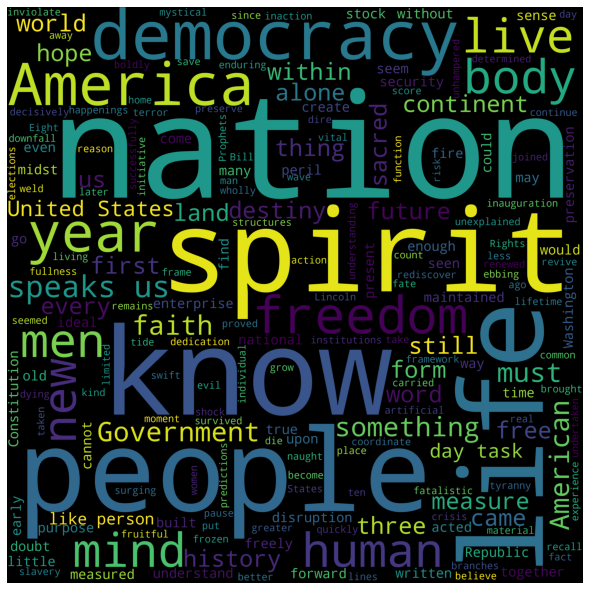

In [30]:
# Word Cloud for Roosevelt speech
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 3000, height = 3000,stopwords=STOPWORDS, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(new_textR) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud of Inaugural speech of Roosevelt (after cleaning)!!")
plt.show()

Word Cloud Inaugural speech of Kennedy (after cleaning)!!


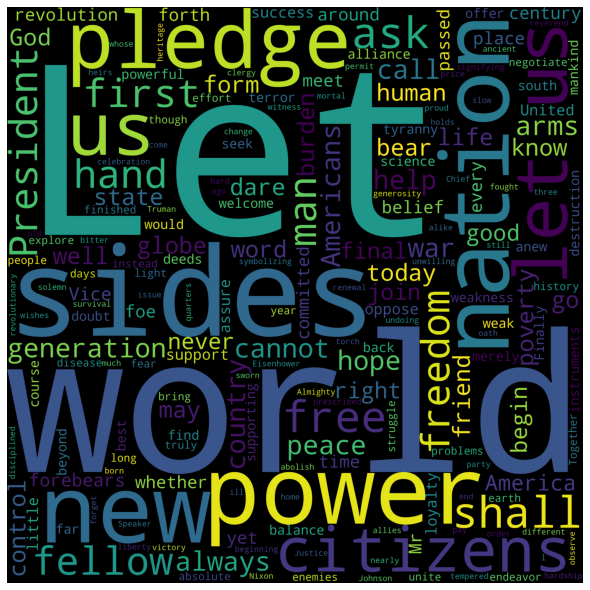

In [31]:
# Word Cloud for Kennedy speech

wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, stopwords=STOPWORDS,random_state=100).generate(new_textK) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud Inaugural speech of Kennedy (after cleaning)!!")
plt.show()


Word Cloud Inaugural speech of Nixon (after cleaning)!!


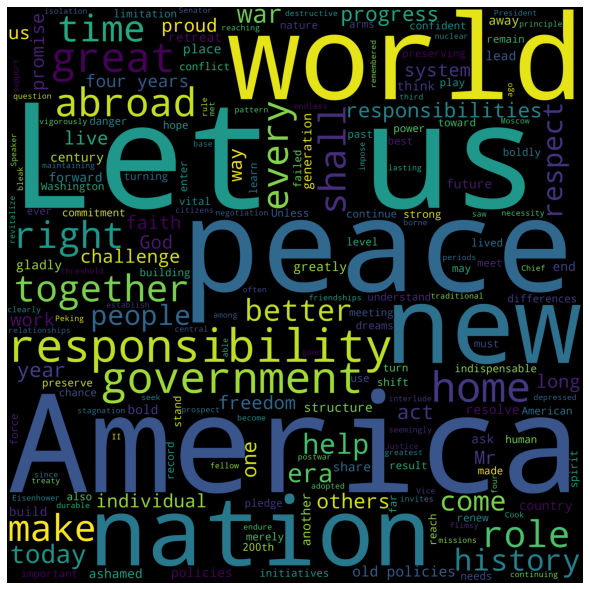

In [29]:
# Word Cloud for Roosevelt speech

wordcloud = WordCloud(width = 3000, height = 3000,stopwords=STOPWORDS, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(new_textN) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud Inaugural speech of Nixon (after cleaning)!!")
plt.show()